## Random Forest Hauptnutzfläche
Random Forest Model zur Schätzung der Hauptnutzfläche

### Datensatz
Imports & Datensatz laden

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import package.charts as charts
import package.importer as im
import package.ml_helper as ml_helper

# load dataset
df = im.get_dataset('package/dataset.csv')
# df = im.cap_by_gf_hnf(df) # exclude big areas
X, y = ml_helper.hnf_dataset(df)

### Modell trainieren
Auswertung des trainierten Models

In [2]:
# Use 20% of package for testing the model
# TODO: Use stratify=X[im.FIELD_USAGE_CLUSTER] when own clustering
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# algorithm & train
regr = RandomForestRegressor(n_estimators=20, random_state=0)
model = regr.fit(X_train, y_train)

### Evaluieren
Auswertung des trainierten Models

In [3]:
predictions = model.predict(X_test).astype(int)
actual = y_test.to_numpy().astype(int)
r_score = regr.score(X, y)
ml_helper.l_reg_evaluation(predictions, actual, r_score)

First 10 result of prediction
-------------------------
Prediction:  [  364  3377   199  1599  1371  1769  1901 11689   387   117]
Actual:  [  329  4593   182  2099  1399  2351  1929 14503   225    87]

Evaluation
-------------------------
R^2 value:  0.9778641612202826
Mean Absolute Error (MAE):  387.609375
Root Mean Squared Error (RMSE):  392071.203125
Max error:  2814


### Features Importance
Wichtigkeit der Features für das Modell

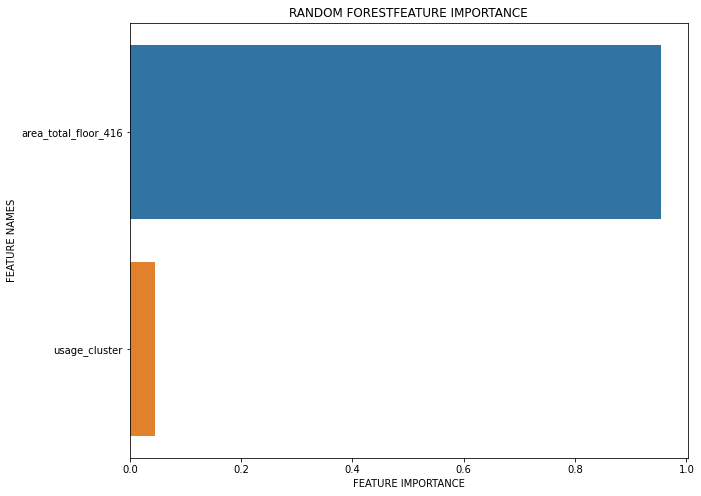

In [4]:
charts.plot_feature_importance(model.feature_importances_,X_train.columns,'RANDOM FOREST')

### Decision Tree
Visualisieren des Desicion Tree

In [5]:
# TODO: Tree visualisation